In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('data.csv', sep='\t')

In [3]:
df

,number_bedrooms,number_bath,area,property_address,price
0,2,2,1.200,Chicago,409900
1,2,1,1.000,Chicago,178804
2,2,1,None,Chicago,384900
3,3,2.5,1.617,Chicago,185000
4,3,1.5,1.048,Chicago,338000
...,...,...,...,...,...
345,3,2.5,2.300,Chicago,1249500
346,2,1,850,Oak Lawn,125000
347,None,None,4356 (Lot),Chicago,23000
348,4,1,1.594,Chicago,68000


### Preprocressing

In [29]:
# chack None data in dataframe
print('Number_bedrooms  ', df['number_bedrooms'].apply(lambda x: x == "None").value_counts())
print("skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk")
print('number_bath  ', df['number_bath'].apply(lambda x: x == "None").value_counts())
print("skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk")
print('area  ', df['area'].apply(lambda x: x == "None").value_counts())
print("skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk")
print('price  ', df['price'].apply(lambda x: x == "None").value_counts())
print("skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk")
print('property_address  ', df['property_address'].apply(lambda x: x == "None").value_counts())

Number_bedrooms   False    341
Name: number_bedrooms, dtype: int64
skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
number_bath   False    341
Name: number_bath, dtype: int64
skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
area   False    341
Name: area, dtype: int64
skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
price   False    341
Name: price, dtype: int64
skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
property_address   False    341
Name: property_address, dtype: int64


In [30]:
# chack null data in dataframe
print('Number_bedrooms  ', df['number_bedrooms'].isnull().value_counts())
print('number_bath  ', df['number_bath'].isnull().value_counts())
print('area  ', df['area'].isnull().value_counts())
print('price  ', df['price'].isnull().value_counts())
print('property_address  ', df['property_address'].isnull().value_counts())

Number_bedrooms   False    341
Name: number_bedrooms, dtype: int64
number_bath   False    341
Name: number_bath, dtype: int64
area   False    236
True     105
Name: area, dtype: int64
price   False    341
Name: price, dtype: int64
property_address   False    341
Name: property_address, dtype: int64


In [6]:
df[['area']]  =  df[['area']].replace(
     to_replace='None', value=np.nan)

In [7]:
# drop data Nane in dataframe (columns: Number_bedrooms, number_bath)
df[['number_bedrooms', 'number_bath']]  =  df[['number_bedrooms', 'number_bath']].replace(
     to_replace='None', value=np.nan)
df = df.dropna(subset=['number_bedrooms', 'number_bath'])
df

,number_bedrooms,number_bath,area,property_address,price
0,2,2,1.200,Chicago,409900
1,2,1,1.000,Chicago,178804
2,2,1,NaN,Chicago,384900
3,3,2.5,1.617,Chicago,185000
4,3,1.5,1.048,Chicago,338000
...,...,...,...,...,...
344,8,3,NaN,Chicago,1099999
345,3,2.5,2.300,Chicago,1249500
346,2,1,850,Oak Lawn,125000
348,4,1,1.594,Chicago,68000


In [8]:
df[['property_address']] = df[['property_address']].apply(lambda col: pd.factorize(col, sort=True)[0])
df

C:\Users\Hanieh\AppData\Local\Temp\ipykernel_11872\3331866629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['property_address']] = df[['property_address']].apply(lambda col: pd.factorize(col, sort=True)[0])


,number_bedrooms,number_bath,area,property_address,price
0,2,2,1.200,1,409900
1,2,1,1.000,1,178804
2,2,1,NaN,1,384900
3,3,2.5,1.617,1,185000
4,3,1.5,1.048,1,338000
...,...,...,...,...,...
344,8,3,NaN,1,1099999
345,3,2.5,2.300,1,1249500
346,2,1,850,4,125000
348,4,1,1.594,1,68000


In [9]:
df[['price']].value_counts()

price  
275000     7
164900     6
450000     6
549900     5
750000     5
          ..
374900     1
379000     1
379900     1
384900     1
6495000    1
Length: 226, dtype: int64

### Analized Data

In [10]:
# convert object to int
df['number_bedrooms']= pd.to_numeric(df['number_bedrooms'])

df['number_bath']= pd.to_numeric(df['number_bath'])

df['area']= pd.to_numeric(df['area'])

df['price']= df['price'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 349
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number_bedrooms   341 non-null    int64  
 1   number_bath       341 non-null    float64
 2   area              236 non-null    float64
 3   property_address  341 non-null    int64  
 4   price             341 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.0 KB


C:\Users\Hanieh\AppData\Local\Temp\ipykernel_11872\3772652479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_bedrooms']= pd.to_numeric(df['number_bedrooms'])
C:\Users\Hanieh\AppData\Local\Temp\ipykernel_11872\3772652479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_bath']= pd.to_numeric(df['number_bath'])
C:\Users\Hanieh\AppData\Local\Temp\ipykernel_11872\3772652479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [11]:
df[['number_bedrooms']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 349
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   number_bedrooms  341 non-null    int64
dtypes: int64(1)
memory usage: 5.3 KB


array([[<AxesSubplot:title={'center':'number_bedrooms'}>,
        <AxesSubplot:title={'center':'number_bath'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'property_address'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

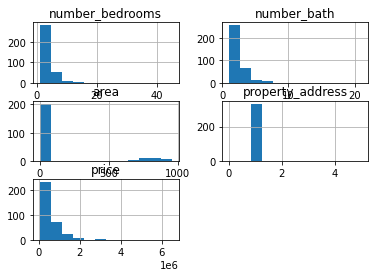

In [12]:
df.hist(bins=12)

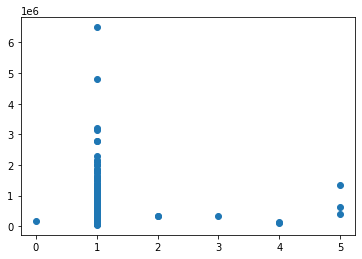

In [13]:
plt.scatter(df['property_address'], df['price'])
# df['price']

### feature selection


In [14]:
df.columns

Index(['number_bedrooms', 'number_bath', 'area', 'property_address', 'price'], dtype='object')

In [36]:
x = df[['number_bedrooms', 'number_bath', 'property_address']].values
y = df[['price']].values
print(type(x))

<class 'numpy.ndarray'>


#### transform

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)


#### train test  split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### model selection

In [50]:
# model = MLPRegressor()
# print( cross_val_score(model, x_train, y_train.ravel(), cv=10) )
model = RandomForestRegressor()
print( cross_val_score(model, x_train, y_train.ravel(), cv=10) )

[-6.12488107 -0.19099924  0.57085841 -1.27640627  0.51421311  0.017515
 -0.36873904  0.12016875  0.12048274 -0.06239988]


In [51]:
from sklearn.svm import SVR
model = SVR()
print( cross_val_score(model, x_train, y_train.ravel(), cv=10) )


[-0.06626743 -0.02813125 -0.21425562 -0.14199601 -0.02284409 -0.00898411
 -0.11972676 -0.00093284 -0.23306267 -0.11935926]


In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print( cross_val_score(model, x_train, y_train.ravel(), cv=10) )


[-2.69423116  0.20344721  0.15727903  0.21058835  0.36110202  0.11340212
  0.59251899  0.02699811  0.18001414  0.0766579 ]


In [58]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=7)
print( cross_val_score(model, x_train, y_train.ravel(), cv=10) )


[-2.76134658  0.34253243  0.44499265  0.1229054   0.45507617 -0.00295875
  0.60436484  0.0395902   0.14412688  0.31904074]


In [59]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
print( cross_val_score(model, x_train, y_train.ravel(), cv=10) )


[-1.64681911 -0.6940554   0.56702521 -1.97721825  0.49360158  0.03101673
 -2.02513285  0.12611063 -0.03567599 -0.42715613]
